

# Project: TMDb movie data analysis


<a id='intro'></a>
## Introduction

This dataset contains around 10000 movies collected from the (TMDB) including user ratings and reviews.

### Questions that were asked 
Question 1: Is the high percentage of votes the reason for the increase in the percentage of income?

Question 2: Is the high percentage of votes and income a reason to increase the budget ratio?

Question 3: What are the most voted and popular types?

In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

we called in the librarirs we needed

<a id='wrangling'></a>
## Data Wrangling


In [3]:
import pandas as pd
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.describe(include="O")

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.missionimpossible.com/,Woody Allen,Based on a true story.,woman director,No overview found.,Drama,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We downloaded the data and checked it

In [8]:
df=pd.read_csv('tmdb-movies.csv')
df.drop(['homepage','director','tagline','overview','runtime','keywords','release_date','imdb_id',],axis=1 , inplace=True)

In [9]:
df.head()

,id,popularity,budget,revenue,original_title,cast,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


We have removed the columns that are not needed by the analysis

# clean up data

In [11]:
sum(df.duplicated())

1

In [12]:
df.drop_duplicates(inplace=True)

we have ermoved the duplicate row

In [13]:
df.head()

,id,popularity,budget,revenue,original_title,cast,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int64  
 11  budget_adj            10865 non-null  float64
 12  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


In [15]:
x=['cast','genres','production_companies']
df.dropna(subset=x,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9791 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9791 non-null   int64  
 1   popularity            9791 non-null   float64
 2   budget                9791 non-null   int64  
 3   revenue               9791 non-null   int64  
 4   original_title        9791 non-null   object 
 5   cast                  9791 non-null   object 
 6   genres                9791 non-null   object 
 7   production_companies  9791 non-null   object 
 8   vote_count            9791 non-null   int64  
 9   vote_average          9791 non-null   float64
 10  release_year          9791 non-null   int64  
 11  budget_adj            9791 non-null   float64
 12  revenue_adj           9791 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.0+ MB


We have deleted the rows that contained missing values

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Is the high percentage of votes the reason for the high percentage of income?)

In [17]:
df.corr()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.000819,-0.137315,-0.095938,-0.027785,-0.085610,0.509570,-0.187849,-0.137704
popularity,0.000819,1.000000,0.539146,0.662503,0.803002,0.237903,0.110241,0.505643,0.606589
budget,-0.137315,0.539146,1.000000,0.731282,0.627186,0.095106,0.137533,0.968329,0.616454
revenue,-0.095938,0.662503,0.731282,1.000000,0.788585,0.191184,0.071268,0.702453,0.918053
vote_count,-0.027785,0.803002,0.627186,0.788585,1.000000,0.278887,0.124191,0.580584,0.704121
vote_average,-0.085610,0.237903,0.095106,0.191184,0.278887,1.000000,-0.138578,0.108751,0.213767
release_year,0.509570,0.110241,0.137533,0.071268,0.124191,-0.138578,1.000000,0.035472,-0.056651
budget_adj,-0.187849,0.505643,0.968329,0.702453,0.580584,0.108751,0.035472,1.000000,0.640974
revenue_adj,-0.137704,0.606589,0.616454,0.918053,0.704121,0.213767,-0.056651,0.640974,1.000000


The following table shows the correlations and their ratios. If the ratio is positive, the correlation between them is positive, but if the ratio is negative, then the correlation between them is inverse.

In [18]:
df['vote_count'].corr(df['revenue'])

0.788585373061879

The ratio is positive , so the relationship is positive.

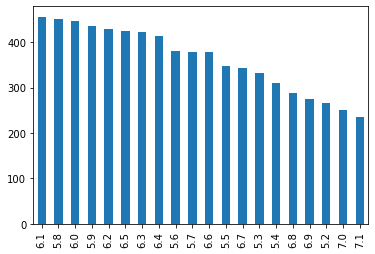

In [47]:
df['vote_average'].value_counts().head(20).plot.bar()

Text(0.5, 1.0, 'vote vs revenue')

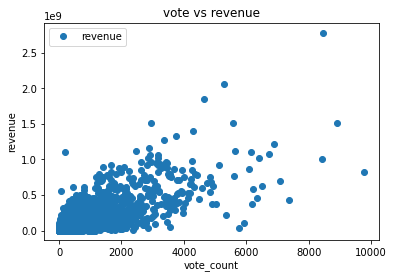

In [51]:
df.plot(x='vote_count',y='revenue',style='o')
plt.xlabel('vote_count')
plt.ylabel('revenue')
plt.title('vote vs revenue')

We notice from the graph and the correlation percentage, that the more votes the number of votes, the higher the income value , we also notice the presence of outliers.

### Research Question 2 (Is the high percentage of votes and income a reason to increase the budget ratio?)

In [93]:
df['vote_count'].corr(df['budget'])

0.6271859093694878

In [94]:
df['revenue'].corr(df['budget'])

0.731281705968308

We notice that all values are positive  , so  the relationship is positive.

Text(0.5, 1.0, 'vote vs budget')

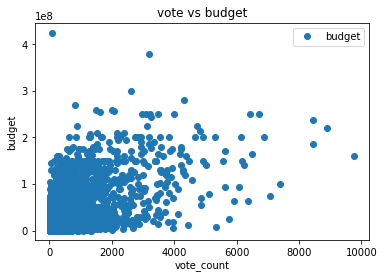

In [49]:
df.plot(x='vote_count',y='budget',style='o')
plt.xlabel('vote_count')
plt.ylabel('budget')
plt.title('vote vs budget')

Text(0.5, 1.0, 'revenue vs budget')

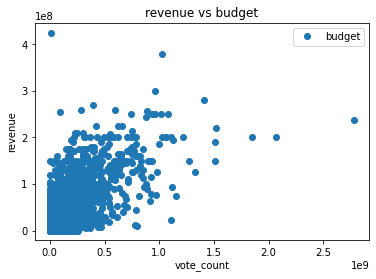

In [50]:
df.plot(x='revenue',y='budget',style='o')
plt.xlabel('vote_count')
plt.ylabel('revenue')
plt.title('revenue vs budget')

We notice from the graph and the correlation rate, that the more votes and the income, the greater the budget, we also notice the presence of outliers.

### Research Question 3 (What are the most voted and popular types?)

In [105]:
def top10sorted(*col2):
    print('df sorted by:',col2)
    
    print(type(col2))
    
    return df.sort_values(by=list(col2), ascending=False)[:10]

In [106]:
x=top10sorted('genres')

df sorted by: ('genres',)
<class 'tuple'>


In [99]:
x=top10sorted('vote_count','popularity')

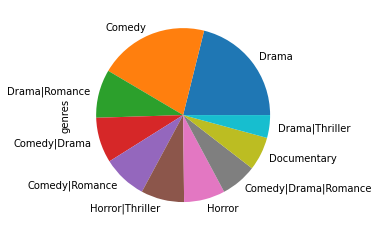

In [109]:
df['genres'].value_counts().head(10).plot.pie()

We note from the graph that the most popular and vote genres are Drama and Comedies.

## Conclusions

Through an analysis of the (IMDB) Movies database , we conclude that , The higher the percentage of votes, the higher the percentage of income , The higher the percentage of votes and the income, the higher the percentage of the budget , And the most popular and voting movies are Drama and Comedy.
One the problems we faced was missing data and duplicate data, and the problem was solved by deleting it.